In [361]:
#python
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0,
n_informative=2, random_state=1, n_clusters_per_class =1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape) 
linearly_separable = (X, y)
X = StandardScaler().fit_transform(X)
for i in range(100):
    if y[i]==0:
        y[i] = y[i]-1
X_train , X_test , y_train , y_test = \
train_test_split(X, y, test_size=.4, random_state=42)

In [362]:
# Initialize fitting parameters
import random
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda and learning rate eta
Lambda = 0.1 
Eta = 0.01
tolerance = 0.0001
theta = initial_theta

In [363]:
def lossFunction(theta, X, y ,Lambda):
    loss = np.log(1+np.exp(-y*np.dot(theta.T,X)))
    grad = -y*X/(1+np.exp(y*np.dot(theta.T,X)))
    return loss, grad

In [364]:
def gradientDescent(X,y,theta,eta,Lambda,tolerance):
    loss, grad = lossFunction(theta, X, y ,Lambda)
    theta = theta*(1-2*Eta*Lambda)-Eta*grad
    return theta

In [365]:
# part b

In [366]:
# fit the train set
from numpy import linalg as LA
import time

start = time.time()
index = random.randint(0,X_train.shape[0]-1)
Xv = X_train[index,:].reshape(2,1)
yv = y_train[index]
loss, grad = lossFunction(theta, Xv, yv,Lambda)
i = 0

lossfunc = 0
for i in range(X_train.shape[0]):
    loss, grad = lossFunction(theta, X_train[i,:].reshape(2,1), y_train[i] ,Lambda)
    lossfunc = lossfunc + loss
losslist = [lossfunc]
lossdiff = 10


while lossdiff >= tolerance:
    i = i+1
    theta = gradientDescent(Xv,yv,theta,Eta,Lambda,tolerance)
    # update
    index = random.randint(0,X_train.shape[0]-1)
    Xv = X_train[index,:].reshape(2,1)
    yv = y_train[index]
    loss, grad = lossFunction(theta, Xv, yv ,Lambda)

    lossfunc = 0
    for i in range(X_train.shape[0]):
        loss, grad = lossFunction(theta, X_train[i,:].reshape(2,1), y_train[i] ,Lambda)
        lossfunc = lossfunc + loss
    losslist.append(lossfunc)
    lossdiff = abs(losslist[-1]-losslist[-2])

end = time.time()
timer = end - start
    

(649,)


Text(0.5, 1.0, 'negative log likelihood vs iterations')

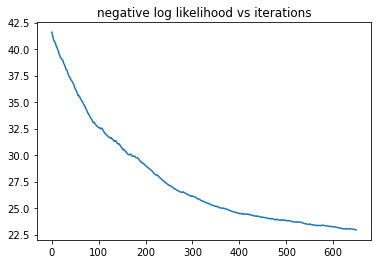

In [367]:
# plot negative log likelihood vs iterations for the train set
losslen = len(losslist)
losslist = np.array(losslist).reshape(losslen,)
mesh = np.linspace(0,losslen,num=losslen)
print(losslist.shape)
plt.plot(mesh,losslist)
plt.title('negative log likelihood vs iterations')

In [368]:
print('the time for tol=10^-5 is {} seconds'.format(timer))

the time for tol=10^-5 is 1.0225956439971924 seconds


In [369]:
# part c

In [370]:
# train accuracy
# use # right predicted/total #
count = 0
for i in range(X_train.shape[0]):
    if np.sign(np.dot(theta.T,X_train[i]))==y_train[i]:
        count = count + 1
        
print('the train accuracy is {}'.format(count/X_train.shape[0]))

the train accuracy is 0.95


In [371]:
# test accuracy
# use # right predicted/total #
count = 0
for i in range(X_test.shape[0]):
    if np.sign(np.dot(theta.T,X_test[i]))==y_test[i]:
        count = count + 1

print('the test accuracy is {}'.format(count/X_test.shape[0]))

the test accuracy is 0.95


Text(0.5, 1.0, 'decision boundary')

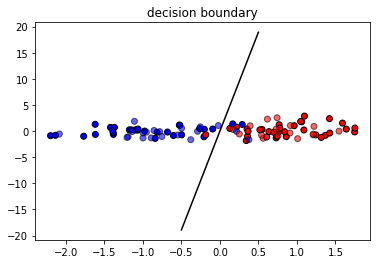

In [373]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min , y_max , h))
# plot the dataset
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train , cmap=cm_bright ,edgecolors='k')
# and test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test , cmap=cm_bright, alpha=0.6,edgecolors='k')

# Decision boundary
a = -theta[0] / theta[1]
xx = np.linspace(-0.5, 0.5,num=100)
yy = a * xx

plt.plot(xx, yy, 'k-')
plt.title('decision boundary')